# RandomForest method

In [214]:
%run dataManagement.ipynb

# Data recovery

In [215]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import accuracy_score
from scikitplot.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score


file1 = 'radiomics_features_set1.csv'
file2 = 'radiomics_features_set2.csv'

data = readCSV(file1,file2)

y = getLabels(data)
X = getData(data)

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y)
print("Training data dimension :",X_train.shape)
print("Test data dimension :",X_test.shape)


Training data dimension : (646, 102)
Test data dimension : (216, 102)


# Learning

### Entropy (best)

In [216]:
#The result is the same for criterion=entropy and criterion=log_loss

clf_entropy = RandomForestClassifier(criterion='entropy',random_state=0)  
clf_entropy.fit(X_train, y_train)
y_pred_entropy=clf_entropy.predict(X_test)
print("Accuracy with entropy:",accuracy_score(y_test, y_pred_entropy))

Accuracy with entropy: 0.9259259259259259


### Gini

In [217]:
clf_gini = RandomForestClassifier(criterion='gini',random_state=0)  
clf_gini.fit(X_train, y_train)
y_pred_gini=clf_gini.predict(X_test)
print("Accuracy with gini:",accuracy_score(y_test, y_pred_gini))

Accuracy with gini: 0.9351851851851852


# Cross Validation

### Entropy

In [218]:
cross_validation = cross_val_score(clf_entropy, X, y) 
print("Evaluation by cross-validation (entropy):",cross_validation)

Evaluation by cross-validation (entropy): [0.84971098 0.90751445 0.89534884 0.93023256 0.90116279]


### Gini

In [219]:
cross_validation = cross_val_score(clf_gini, X, y)
print("Evaluation by cross-validation (gini) :",cross_validation)

Evaluation by cross-validation (gini) : [0.83815029 0.9132948  0.89534884 0.93023256 0.88953488]


# Confusion Matrix

### Entropy

<AxesSubplot: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

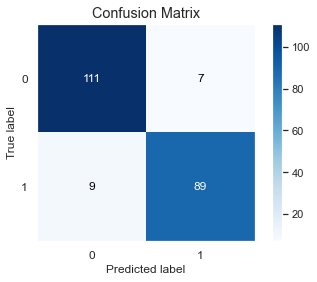

In [220]:
plot_confusion_matrix(y_test,y_pred_entropy)

### Gini

<AxesSubplot: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

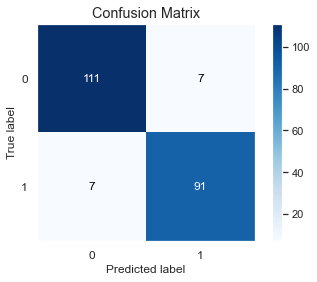

In [221]:
plot_confusion_matrix(y_test,y_pred_gini)

# F1 Score

### Entropy

In [222]:
f1_entropy = f1_score(y_test,y_pred_entropy)
print("F1 score with entropy:",f1_entropy)

F1 score with entropy: 0.9175257731958762


### Gini

In [223]:
f1_gini = f1_score(y_test,y_pred_gini)
print("F1 score with gini:",f1_gini)

F1 score with gini: 0.9285714285714286


# ROC curve

### Entropy

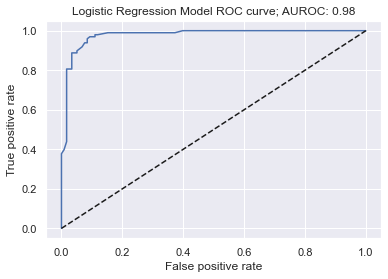

In [224]:
y_pred_proba = clf_entropy.predict_proba(np.array(X_test))[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

AUROC = np.round(roc_auc_score(y_test, y_pred_proba), 2)

plt.title(f'Logistic Regression Model ROC curve; AUROC: {AUROC}');
plt.show()

### Gini

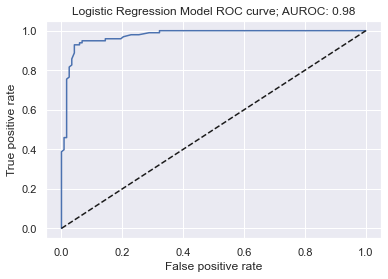

In [225]:
y_pred_proba = clf_gini.predict_proba(np.array(X_test))[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

AUROC = np.round(roc_auc_score(y_test, y_pred_proba), 2)

plt.title(f'Logistic Regression Model ROC curve; AUROC: {AUROC}');
plt.show()

# Recall Curve

### Entropy

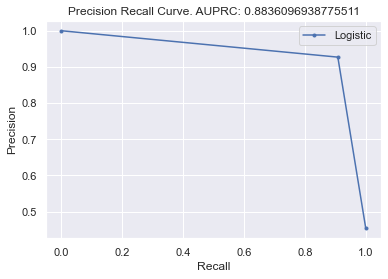

In [226]:
average_precision = average_precision_score(y_test, y_pred_entropy)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_entropy)
plt.plot(recall, precision, marker='.', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title(f'Precision Recall Curve. AUPRC: {average_precision}')
plt.show()

### Gini

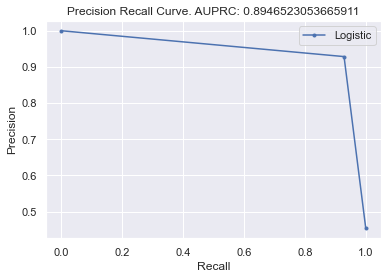

In [227]:
average_precision = average_precision_score(y_test, y_pred_gini)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_gini)
plt.plot(recall, precision, marker='.', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title(f'Precision Recall Curve. AUPRC: {average_precision}')
plt.show()